# HW12
## K-Nearest-Neighbors Algorithm and Machine Learning

22.5 Homework
Choose a dataset from UC Irvine Machine Learning Repository! and apply the Kneighbour algorithm to do classification.

In [1]:
# Ronaldo Ascano

# I directly downloaded the iris data set from the UC Irvine Machine Learning Repository to create a program using
# the sklearn tool included in miniconda to classify the type of iris flower depending on its sepal and petal measurements.

In [312]:
import numpy as np
import pandas as pd
from collections import OrderedDict


df = pd.read_csv('~/Desktop/bezdekIris.data.txt', sep=",")
           
X = np.array(df.drop(['class'], 1, inplace=None))
Y = np.array(df['class'])

#print(X)
#print(Y)

iris = pd.DataFrame(df)
iris = iris.replace({'class':{'Iris-setosa': 'y', 'Iris-versicolor': 'b', 'Iris-virginica': 'r'}})
# ^^^ replace iris types under 'class' column to corresponding color
color_scheme = np.array(iris['class'])

print(color_scheme)

['y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r']


In [278]:
df

,sepal_L,sepal_W,petal_L,petal_W,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [282]:
iris

,sepal_L,sepal_W,petal_L,petal_W,class
0,5.1,3.5,1.4,0.2,y
1,4.9,3.0,1.4,0.2,y
2,4.7,3.2,1.3,0.2,y
3,4.6,3.1,1.5,0.2,y
4,5.0,3.6,1.4,0.2,y
5,5.4,3.9,1.7,0.4,y
6,4.6,3.4,1.4,0.3,y
7,5.0,3.4,1.5,0.2,y
8,4.4,2.9,1.4,0.2,y
9,4.9,3.1,1.5,0.1,y


In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y)

# Split arrays or matrices into random train and test subsets

In [306]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

In [307]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [313]:
# test the accuracy

accuracy = classifier.score(X_test, y_test) * 100
print("The accuracy is {0:.4f} %".format(accuracy))

# .score included in the sklearn.neighbors kit to standardize the data w/o using numpy

The accuracy is 94.7368 %


In [314]:
import random
# input random data and try to classify 
# random_data = np.array([ [4.1,4.0,6.3,1.8] , [4.4,5.0,5.3,0.8] , [5.1,3.5,1.4,0.2] ])
random_data = 6 * np.random.random((3,4))
random_data = random_data.reshape(len(random_data),-1)


# From error message: Reshape your data either using array.reshape(-1, 1) 
# if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

print(random_data)
print('')

prediction = classifier.predict(random_data)
print(prediction)

[[2.08539516 3.41908889 1.71991941 2.01981307]
 [1.86847293 1.74848302 5.74823794 5.13151185]
 [1.33607244 2.59922327 5.33355054 1.48461996]]

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


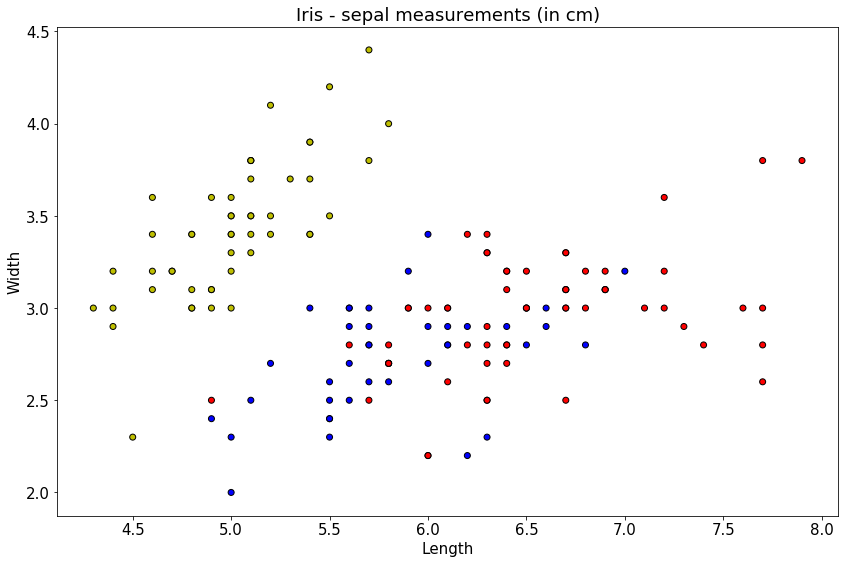

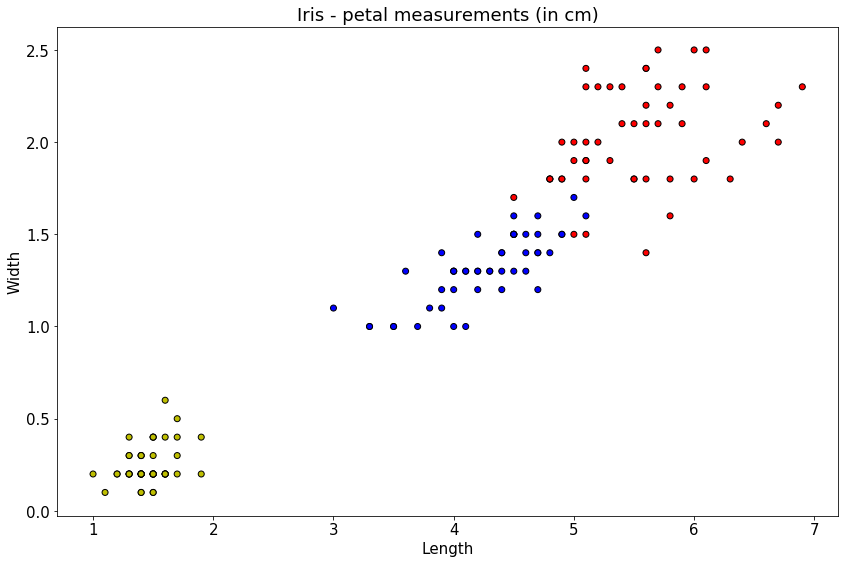

In [324]:
# PLOT HERE
import matplotlib.pyplot as plt


plt.scatter(df['sepal_L'] , df['sepal_W'], c=color_scheme, edgecolor='k')
plt.title('Iris - sepal measurements (in cm)')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()
    
plt.scatter(df['petal_L'] , df['petal_W'], c=color_scheme, edgecolor='k')
plt.title('Iris - petal measurements (in cm)')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


In [288]:
# resize figure and font
plt.rcParams['figure.figsize'] = (14,9)
plt.rcParams.update({'font.size': 15})

In [171]:
help(df.replace)

Help on method replace in module pandas.core.frame:

replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
 